In [3]:
!pip install openpyxl
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [32]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")


✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest



SET 1
MOS001S1 has Ovarian clear cell carcinoma 
MOS002S1 has Cholangiocarcinoma
MOS003S1 has Colorectal adenocarcinoma
MOS004S1 has Rectal squamous cell carcinoma
MOS005S1 has Cholangiocarcinoma
MOS006S1 has Cholangiocarcinoma
MOS007S1 has Cholangiocarcinoma
MOS008S1 has Hurthle cell carcinoma
MOS009S1 has Cholangiocarcinoma
MOS010S1 has Lung adenocarcinoma
MOS011S1 has Papillary thyroid carcinoma
MOS012S1 has Colorectal adenocarcinoma
MOS014S1 has Ovarian serous carcinoma
TO20S1 has Control tonsil

SET 2
MOS015S1 has Papillary urothelial carcinoma
MOS016S1 has Papillary urothelial carcinoma
MOS017S1 has Papillary urothelial carcinoma
MOS018S1 has Papillary urothelial carcinoma
MOS019S1 has Papillary urothelial carcinoma
MOS020S1 has Papillary urothelial carcinoma
MOS021S1 has Papillary urothelial carcinoma
MOS022S1 has Papillary urothelial carcinoma
MOS023S1 has Papillary urothelial carcinoma
MOS024S1 has Papillary urothelial carcinoma
MOS025S1 has Papillary urothelial carcinoma
MOS

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed

/home/yshokrollahi/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be r

MOS077S1 has Colorectal adenocarcinoma
MOS078S1 has Invasive thymoma
MOS079S1 has Papillary urothelial carcinoma
MOS080S1 has Colorectal adenocarcinoma

SET 8
MOS081S1 has Neuroendocrine tumor

VISUALIZATION


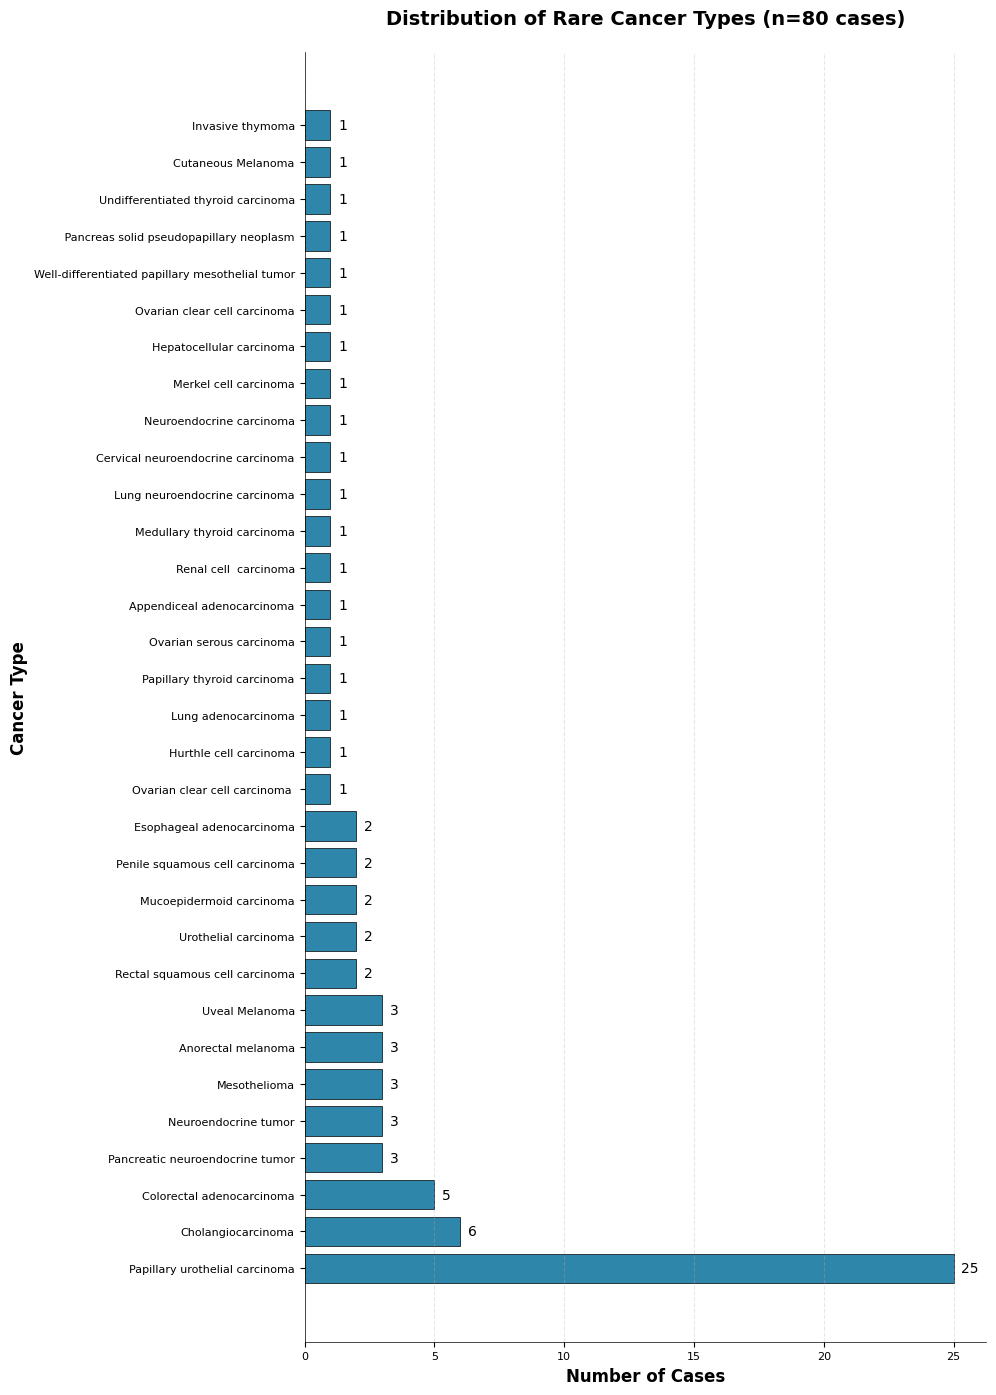


Total cases: 80
Distinct cancer types: 32

Cancer type frequencies:
Papillary urothelial carcinoma: 25
Cholangiocarcinoma: 6
Colorectal adenocarcinoma: 5
Pancreatic neuroendocrine tumor: 3
Neuroendocrine tumor: 3
Mesothelioma: 3
Anorectal melanoma: 3
Uveal Melanoma: 3
Rectal squamous cell carcinoma: 2
Urothelial carcinoma: 2
Mucoepidermoid carcinoma: 2
Penile squamous cell carcinoma: 2
Esophageal adenocarcinoma: 2
Ovarian clear cell carcinoma : 1
Hurthle cell carcinoma: 1
Lung adenocarcinoma: 1
Papillary thyroid carcinoma: 1
Ovarian serous carcinoma: 1
Appendiceal adenocarcinoma: 1
Renal cell  carcinoma: 1
Medullary thyroid carcinoma: 1
Lung neuroendocrine carcinoma: 1
Cervical neuroendocrine carcinoma: 1
Neuroendocrine carcinoma: 1
Merkel cell carcinoma: 1
Hepatocellular carcinoma: 1
Ovarian clear cell carcinoma: 1
Well-differentiated papillary mesothelial tumor: 1
 Pancreas solid pseudopapillary neoplasm: 1
Undifferentiated thyroid carcinoma: 1
Cutaneous Melanoma: 1
Invasive thymoma

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

# Base path
base_path = '/rsrch9/home/plm/idso_fa1_pathology/TIER1/patient-mosaic/2014-0938/MOSAIC/DSP'

# Dictionary to store all data
all_data = {}

# Iterate through Set 1 to Set 16
for i in range(1, 9):
    # Try both naming conventions
    folder_names = [f'MOSAIC DSP Set {i}', f'MOSAIC Set {i}']
    file_names = [f'MOSAIC DSP Set {i} Annotations AS.xlsx', f'MOSAIC Set {i} Annotations AS.xlsx']
    
    found = False
    for folder_name in folder_names:
        for file_name in file_names:
            file_path = os.path.join(base_path, folder_name, 'Data', file_name)
            
            # Check if file exists
            if os.path.exists(file_path):
                found = True
                print(f"\n{'='*60}")
                print(f"SET {i}")
                print(f"{'='*60}")
                
                try:
                    # Read the Excel file to check column names
                    df = pd.read_excel(file_path)
                    
                    # Determine which column name is present
                    if 'Primary_Dx' in df.columns:
                        dx_column = 'Primary_Dx'
                    elif 'Primary Dx' in df.columns:
                        dx_column = 'Primary Dx'
                    else:
                        print(f"Neither 'Primary_Dx' nor 'Primary Dx' found in columns")
                        print(f"Available columns: {list(df.columns)}")
                        break
                    
                    # Keep only the columns we need
                    df = df[['Slide_ID_DSP', dx_column]]
                    
                    # Remove duplicate slide IDs
                    df_unique = df.drop_duplicates(subset='Slide_ID_DSP')
                    
                    # Print and store the results
                    for _, row in df_unique.iterrows():
                        slide_id = row['Slide_ID_DSP']
                        cancer_type = row[dx_column]
                        print(f"{slide_id} has {cancer_type}")
                        
                        # Store in dictionary (skip control samples)
                        if 'control' not in cancer_type.lower() and 'tonsil' not in cancer_type.lower():
                            all_data[slide_id] = cancer_type
                            
                except Exception as e:
                    print(f"Error reading file: {e}")
                
                break
        if found:
            break
    
    if not found:
        print(f"\n{'='*60}")
        print(f"SET {i}")
        print(f"{'='*60}")
        print(f"File not found for Set {i}")

print(f"\n{'='*60}")
print("VISUALIZATION")
print(f"{'='*60}")

# Count cancer types
cancer_counts = Counter(all_data.values())

# Sort by frequency
sorted_cancers = sorted(cancer_counts.items(), key=lambda x: x[1], reverse=True)
cancer_types = [x[0] for x in sorted_cancers]
counts = [x[1] for x in sorted_cancers]

# Create figure
fig, ax = plt.subplots(figsize=(10, 14))

# Create horizontal bar chart
bars = ax.barh(cancer_types, counts, color='#2E86AB', edgecolor='black', linewidth=0.5)

# Styling for Nature-style
ax.set_xlabel('Number of Cases', fontsize=12, fontweight='bold')
ax.set_ylabel('Cancer Type', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of Rare Cancer Types (n={len(all_data)} cases)', fontsize=14, fontweight='bold', pad=20)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.text(count + 0.3, i, str(count), va='center', fontsize=10)

# Clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal cases: {len(all_data)}")
print(f"Distinct cancer types: {len(cancer_counts)}")
print(f"\nCancer type frequencies:")
for cancer, count in sorted_cancers:
    print(f"{cancer}: {count}")

In [42]:
import pandas as pd
from collections import Counter, defaultdict

# Your data (extracted from the output)
all_data = {
    'MOS001S1': 'Ovarian clear cell carcinoma ',
    'MOS002S1': 'Cholangiocarcinoma',
    'MOS003S1': 'Colorectal adenocarcinoma',
    'MOS004S1': 'Rectal squamous cell carcinoma',
    'MOS008S1': 'Hurthle cell carcinoma',
    'MOS010S1': 'Lung adenocarcinoma',
    'MOS011S1': 'Papillary thyroid carcinoma',
    'MOS014S1': 'Ovarian serous carcinoma',
    'MOS015S1': 'Papillary urothelial carcinoma',
    'MOS027S1': 'Urothelial carcinoma',
    'MOS030S1': 'Appendiceal adenocarcinoma',
    'MOS033S1': 'Mucoepidermoid carcinoma',
    'MOS034S1': 'Penile squamous cell carcinoma',
    'MOS042S1': 'Renal cell  carcinoma',
    'MOS045S1': 'Medullary thyroid carcinoma',
    'MOS046S1': 'Pancreatic neuroendocrine tumor',
    'MOS047S1': 'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS055S1': 'Mesothelioma',
    'MOS058S1': 'Hepatocellular carcinoma',
    'MOS059S1': 'Ovarian clear cell carcinoma',
    'MOS060S1': 'Well-differentiated papillary mesothelial tumor',
    'MOS061S1': ' Pancreas solid pseudopapillary neoplasm',
    'MOS064S1': 'Esophageal adenocarcinoma',
    'MOS067S1': 'Undifferentiated thyroid carcinoma',
    'MOS070S1': 'Anorectal melanoma',
    'MOS073S1': 'Uveal Melanoma',
    'MOS076S1': 'Cutaneous Melanoma',
    'MOS078S1': 'Invasive thymoma',
    'MOS082S1': 'Spindle cell neoplasm',
    'MOS083S1': 'Malignant sarcomatoid tumor',
    'MOS084S1': 'Uterine adenosarcoma',
    'MOS085S1': 'Spindle cell malignant neoplasm',
    'MOS086S1': 'Chondrosarcoma',
    'MOS087S1': 'Dedifferentiated liposarcoma',
    'MOS088S1': 'Unclassified small round cell sarcoma',
    'MOS090S1': 'Spindle Cell Sarcoma',
    'MOS092S4': 'Dermatofibrosarcoma',
    'MOS093S4': 'Osteosarcoma',
    'MOS094T2S1': 'Pleomorphic sarcoma',
    'MOS096S3': 'Undifferentiated pleomorphic sarcoma',
    'MOS097S1': 'Synovial Sarcoma',
    'MOS098S1': 'Leiomyosarcoma',
    'MOS099S1': 'Ossifying fibromyxoid tumor',
    'MOS100S1': 'Desmoplastic small round cell tumor',
    'MOS103S1': 'Liposarcoma',
    'MOS104S1': 'Hyalinizing spindle cell sarcoma',
    'MOS109S1': 'Well-differentiated liposarcoma',
    'MOS114S1': 'Rhabdomyosarcoma',
    'MOS118S1': 'Alveolar soft part sarcoma',
    'MOS132S1': 'Spindle cell sarcoma',
    'MOS138T2S1': 'Low grade sarcomatoid process',
    'MOS143S1': 'Synovial sarcoma',
    'MOS150S1': 'Extraskeletal Chondrosarcoma',
    'MOS153S1': 'Uterine carcinosarcoma',
    'MOS158S1': 'Chordoma',
    'MOS160S1': 'Vulvovaginal melanoma',
    'MOS163S1': 'Sinonasal melanoma',
    'MOS171S1': 'Conjunctival melanoma',
    'MOS184S1': 'Nasolacrimal melanoma',
}

# Group by cancer type
cancer_to_slides = defaultdict(list)
for slide, cancer in all_data.items():
    cancer_to_slides[cancer].append(slide)

# Print selected samples
print("SELECTED SAMPLES TO REPRESENT ALL 63 DISTINCT CANCER TYPES")
print("="*70)
print(f"\nTotal samples needed: {len(cancer_to_slides)}")
print(f"\nSlide ID -> Cancer Type")
print("-"*70)

selected_samples = []
for cancer_type in sorted(cancer_to_slides.keys()):
    # Select the first slide for each cancer type
    slide_id = cancer_to_slides[cancer_type][0]
    selected_samples.append((slide_id, cancer_type))
    print(f"{slide_id:15s} -> {cancer_type}")

print("\n" + "="*70)
print(f"TOTAL SELECTED: {len(selected_samples)} samples")
print("="*70)

# Print by cancer category for better organization
print("\n\nORGANIZED BY CATEGORY:")
print("="*70)

categories = {
    'Carcinomas - GI': ['Cholangiocarcinoma', 'Colorectal adenocarcinoma', 'Rectal squamous cell carcinoma', 
                        'Appendiceal adenocarcinoma', 'Esophageal adenocarcinoma', 'Hepatocellular carcinoma',
                        ' Pancreas solid pseudopapillary neoplasm'],
    'Carcinomas - Gynecologic': ['Ovarian clear cell carcinoma ', 'Ovarian clear cell carcinoma', 'Ovarian serous carcinoma',
                                  'Cervical neuroendocrine carcinoma', 'Uterine adenosarcoma', 'Uterine carcinosarcoma'],
    'Carcinomas - Urologic': ['Papillary urothelial carcinoma', 'Urothelial carcinoma', 'Renal cell  carcinoma',
                              'Penile squamous cell carcinoma'],
    'Carcinomas - Thyroid': ['Papillary thyroid carcinoma', 'Medullary thyroid carcinoma', 'Undifferentiated thyroid carcinoma',
                            'Hurthle cell carcinoma'],
    'Neuroendocrine Tumors': ['Pancreatic neuroendocrine tumor', 'Lung neuroendocrine carcinoma', 'Neuroendocrine carcinoma',
                              'Neuroendocrine tumor', 'Merkel cell carcinoma'],
    'Lung': ['Lung adenocarcinoma'],
    'Mesothelioma': ['Mesothelioma', 'Well-differentiated papillary mesothelial tumor'],
    'Other Carcinomas': ['Mucoepidermoid carcinoma', 'Invasive thymoma'],
    'Melanomas': ['Anorectal melanoma', 'Vulvovaginal melanoma', 'Sinonasal melanoma', 'Uveal Melanoma',
                  'Cutaneous Melanoma', 'Conjunctival melanoma', 'Nasolacrimal melanoma'],
    'Sarcomas - Liposarcoma': ['Dedifferentiated liposarcoma', 'Well-differentiated liposarcoma', 'Liposarcoma'],
    'Sarcomas - Leiomyosarcoma': ['Leiomyosarcoma'],
    'Sarcomas - Bone/Cartilage': ['Chondrosarcoma', 'Osteosarcoma', 'Extraskeletal Chondrosarcoma', 'Chordoma'],
    'Sarcomas - Synovial': ['Synovial Sarcoma', 'Synovial sarcoma'],
    'Sarcomas - Pleomorphic/Spindle': ['Undifferentiated pleomorphic sarcoma', 'Pleomorphic sarcoma', 'Spindle cell neoplasm',
                                        'Spindle cell malignant neoplasm', 'Spindle Cell Sarcoma', 'Spindle cell sarcoma'],
    'Sarcomas - Other': ['Malignant sarcomatoid tumor', 'Unclassified small round cell sarcoma', 'Dermatofibrosarcoma',
                         'Desmoplastic small round cell tumor', 'Ossifying fibromyxoid tumor', 'Hyalinizing spindle cell sarcoma',
                         'Rhabdomyosarcoma', 'Alveolar soft part sarcoma', 'Low grade sarcomatoid process']
}

for category, cancer_types in categories.items():
    print(f"\n{category}:")
    for cancer_type in cancer_types:
        if cancer_type in cancer_to_slides:
            slide_id = cancer_to_slides[cancer_type][0]
            print(f"  {slide_id:15s} -> {cancer_type}")

SELECTED SAMPLES TO REPRESENT ALL 63 DISTINCT CANCER TYPES

Total samples needed: 63

Slide ID -> Cancer Type
----------------------------------------------------------------------
MOS061S1        ->  Pancreas solid pseudopapillary neoplasm
MOS118S1        -> Alveolar soft part sarcoma
MOS070S1        -> Anorectal melanoma
MOS030S1        -> Appendiceal adenocarcinoma
MOS048T2S1      -> Cervical neuroendocrine carcinoma
MOS002S1        -> Cholangiocarcinoma
MOS086S1        -> Chondrosarcoma
MOS158S1        -> Chordoma
MOS003S1        -> Colorectal adenocarcinoma
MOS171S1        -> Conjunctival melanoma
MOS076S1        -> Cutaneous Melanoma
MOS087S1        -> Dedifferentiated liposarcoma
MOS092S4        -> Dermatofibrosarcoma
MOS100S1        -> Desmoplastic small round cell tumor
MOS064S1        -> Esophageal adenocarcinoma
MOS150S1        -> Extraskeletal Chondrosarcoma
MOS058S1        -> Hepatocellular carcinoma
MOS008S1        -> Hurthle cell carcinoma
MOS104S1        -> Hyalinizing 

Saved: cancer_type_hierarchy.pdf


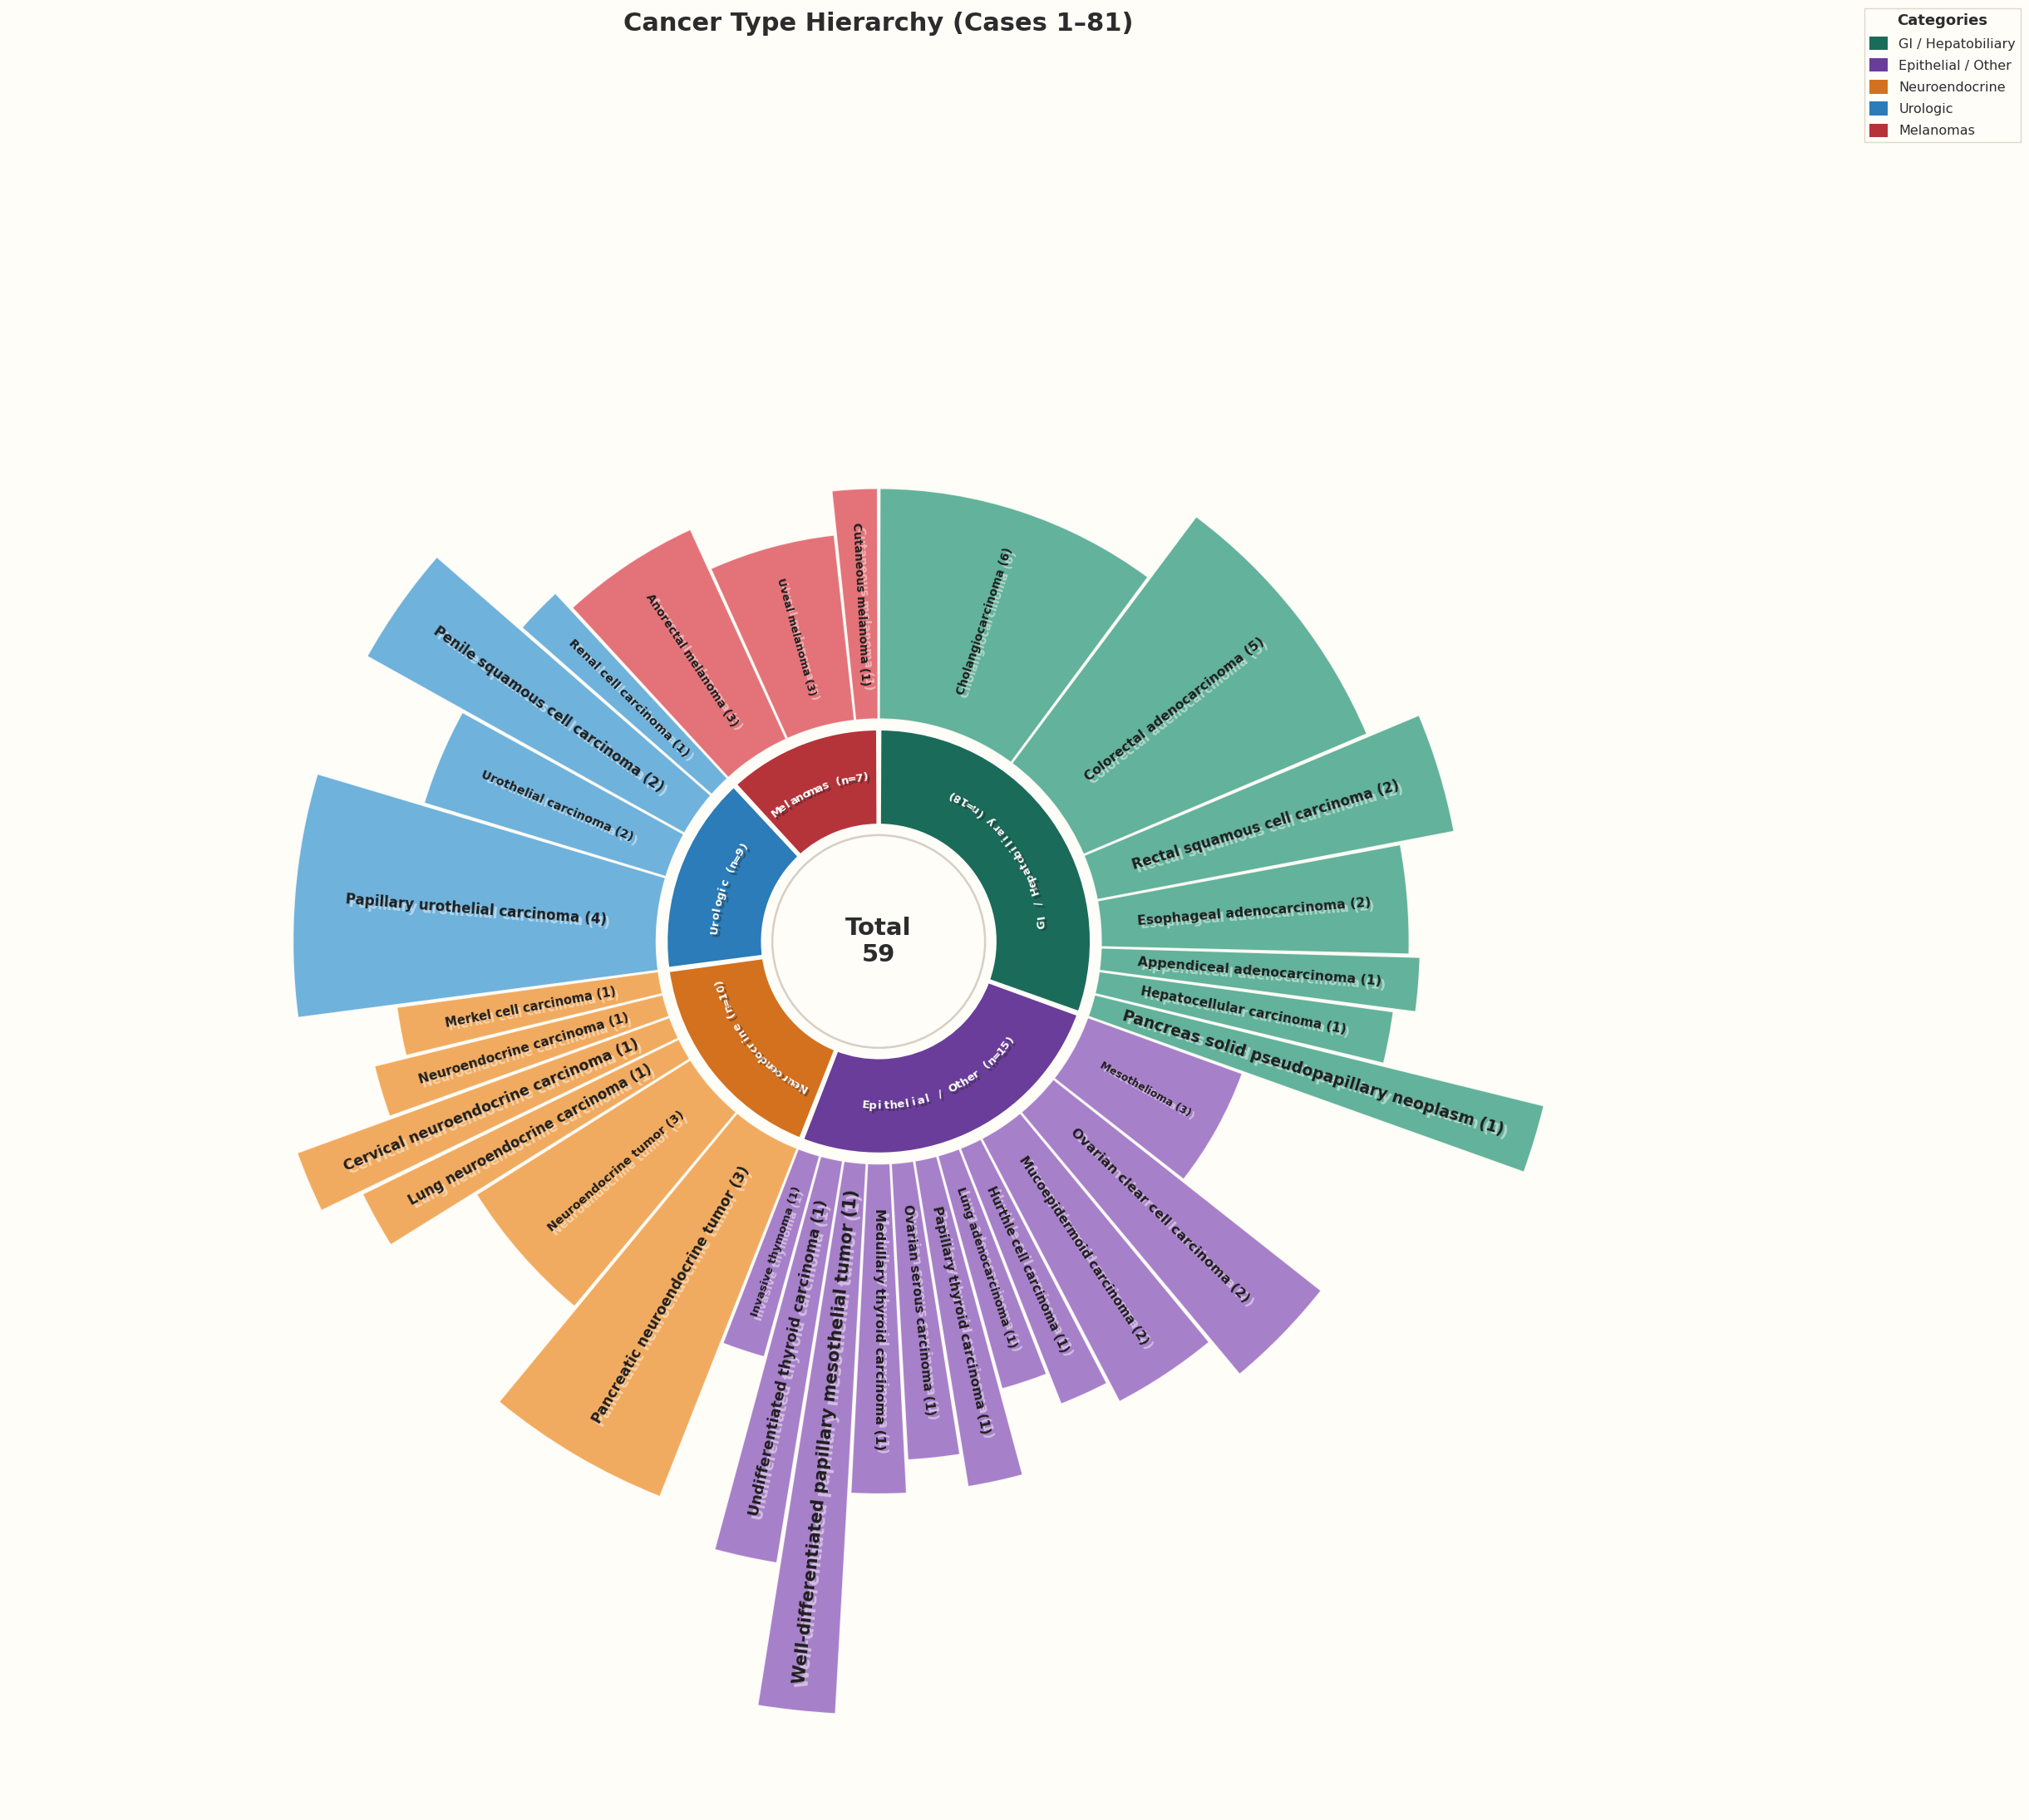

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.patches import Wedge, Patch
from collections import defaultdict, Counter

# ==========================================
# DATA  (cases 1–81)
# ==========================================
all_data = {
    'MOS001S1':   'Ovarian clear cell carcinoma',
    'MOS002S1':   'Cholangiocarcinoma',
    'MOS003S1':   'Colorectal adenocarcinoma',
    'MOS004S1':   'Rectal squamous cell carcinoma',
    'MOS005S1':   'Cholangiocarcinoma',
    'MOS006S1':   'Cholangiocarcinoma',
    'MOS007S1':   'Cholangiocarcinoma',
    'MOS008S1':   'Hurthle cell carcinoma',
    'MOS009S1':   'Cholangiocarcinoma',
    'MOS010S1':   'Lung adenocarcinoma',
    'MOS011S1':   'Papillary thyroid carcinoma',
    'MOS012S1':   'Colorectal adenocarcinoma',
    'MOS014S1':   'Ovarian serous carcinoma',
    'MOS015S1':   'Papillary urothelial carcinoma',
    'MOS016S1':   'Papillary urothelial carcinoma',
    'MOS017S1':   'Papillary urothelial carcinoma',
    'MOS018S1':   'Papillary urothelial carcinoma',
    'MOS027S1':   'Urothelial carcinoma',

    'MOS030S1':   'Appendiceal adenocarcinoma',
    'MOS031S1':   'Rectal squamous cell carcinoma',
    'MOS032S1':   'Cholangiocarcinoma',
    'MOS033S1':   'Mucoepidermoid carcinoma',
    'MOS034S1':   'Penile squamous cell carcinoma',
    'MOS036S1':   'Penile squamous cell carcinoma',

    'MOS041S1':   'Urothelial carcinoma',
    'MOS042S1':   'Renal cell carcinoma',

    'MOS045S1':   'Medullary thyroid carcinoma',
    'MOS046S1':   'Pancreatic neuroendocrine tumor',
    'MOS047S1':   'Lung neuroendocrine carcinoma',
    'MOS048T2S1': 'Cervical neuroendocrine carcinoma',
    'MOS049T2S1': 'Neuroendocrine carcinoma',
    'MOS050T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS051T2S1': 'Pancreatic neuroendocrine tumor',
    'MOS052T2S1': 'Merkel cell carcinoma',
    'MOS053T2S1': 'Neuroendocrine tumor',
    'MOS054T2S1': 'Neuroendocrine tumor',
    'MOS055S1':   'Mesothelioma',
    'MOS056S1':   'Mesothelioma',
    'MOS057S1':   'Mesothelioma',
    'MOS058S1':   'Hepatocellular carcinoma',
    'MOS059S1':   'Ovarian clear cell carcinoma',
    'MOS060S1':   'Well-differentiated papillary mesothelial tumor',
    'MOS061S1':   'Pancreas solid pseudopapillary neoplasm',
    'MOS062S1':   'Colorectal adenocarcinoma',
    'MOS063S1':   'Mucoepidermoid carcinoma',
    'MOS064S1':   'Esophageal adenocarcinoma',
    'MOS065S1':   'Esophageal adenocarcinoma',
    'MOS067S1':   'Undifferentiated thyroid carcinoma',

    'MOS070S1':   'Anorectal melanoma',
    'MOS071S1':   'Anorectal melanoma',
    'MOS072S1':   'Anorectal melanoma',
    'MOS073S1':   'Uveal melanoma',
    'MOS074S1':   'Uveal melanoma',
    'MOS075S1':   'Uveal melanoma',
    'MOS076S1':   'Cutaneous melanoma',
    'MOS077S1':   'Colorectal adenocarcinoma',
    'MOS078S1':   'Invasive thymoma',
    'MOS080S1':   'Colorectal adenocarcinoma',
    'MOS081S1':   'Neuroendocrine tumor',
}

# ==========================================
# HELPERS
# ==========================================
def categorize(cancer):
    c = cancer.lower().strip()
    if 'melanoma' in c:
        return 'Melanomas'
    elif 'neuroendocrine' in c or 'merkel' in c:
        return 'Neuroendocrine'
    elif any(x in c for x in ['urothelial', 'renal', 'penile']):
        return 'Urologic'
    elif any(x in c for x in ['colorectal', 'rectal', 'cholangiocarcinoma',
                               'appendiceal', 'esophageal', 'hepatocellular', 'pancreas']):
        return 'GI / Hepatobiliary'
    else:
        return 'Epithelial / Other'

# ==========================================
# GROUP: category -> Counter of cancer_name -> count
# ==========================================
cat_types = defaultdict(Counter)
for cancer in all_data.values():
    cat_types[categorize(cancer)][cancer.strip()] += 1

# Sort categories by total count descending
sorted_cats = sorted(cat_types.items(), key=lambda x: -sum(x[1].values()))

total_cases = sum(sum(v.values()) for v in cat_types.values())

# ==========================================
# STYLE
# ==========================================
# Inner ring: deep saturated base colors
colors_inner = {
    'GI / Hepatobiliary': '#1B6B5A',   # deep teal
    'Epithelial / Other': '#6A3D9A',   # rich violet
    '(':     '#D4711E',   # warm amber
    'Urologic':           '#2B7CB8',   # ocean blue
    'Melanomas':          '#B5343A',   # deep crimson
}

# Outer ring: lighter, luminous tints of the same hues
colors_outer = {
    'GI / Hepatobiliary': '#4DA88E',   # fresh seafoam
    'Epithelial / Other': '#9B6FC4',   # soft lavender
    'Neuroendocrine':     '#F0A04B',   # golden peach
    'Urologic':           '#5BA8D9',   # sky blue
    'Melanomas':          '#E06068',   # coral rose
}

colors_map = colors_inner   # legacy alias for legend

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

fig, ax = plt.subplots(figsize=(24, 24))
fig.patch.set_facecolor('#FFFDF8')
ax.set_facecolor('#FFFDF8')
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')

inner_r1, inner_r2 = 0.6, 1.1
outer_r1 = 1.15

# ---- label scaling: build all display labels first ----
all_outer_labels = []
for cat, type_counter in sorted_cats:
    for name, count in type_counter.most_common():
        all_outer_labels.append(f"{name} ({count})")

min_len = min(len(l) for l in all_outer_labels)
max_len = max(len(l) for l in all_outer_labels)

def get_outer_radius(label):
    if max_len == min_len:
        norm = 0.5
    else:
        norm = (len(label) - min_len) / (max_len - min_len)
    return 2.0 + norm * 2.0          # 2.0 … 4.0

def get_font_size(label):
    norm = (get_outer_radius(label) - 2.0) / 2.0
    return 9 + norm * 6              # 9 … 15

# ==========================================
# DRAWING
# ==========================================
cat_gap  = 0.5
type_gap = 0.3
current_angle = 90

for cat, type_counter in sorted_cats:
    cat_total      = sum(type_counter.values())
    color_in  = colors_inner.get(cat, '#888888')
    color_out = colors_outer.get(cat, '#AAAAAA')
    cat_angle_span = (cat_total / total_cases) * 360

    cat_start = current_angle
    cat_end   = current_angle - cat_angle_span

    # ---- inner wedge (category) ----
    wi_start = cat_start - cat_gap / 2
    wi_end   = cat_end   + cat_gap / 2

    if wi_start > wi_end:
        ax.add_patch(Wedge((0, 0), inner_r2, wi_end, wi_start,
                           width=(inner_r2 - inner_r1),
                           facecolor=color_in, edgecolor='#FFFDF8', linewidth=3.0))

        if (wi_start - wi_end) > 5:
            label_r = (inner_r1 + inner_r2) / 2  
            mid_ang_deg = (wi_start + wi_end) / 2

            # bottom half → flip so text reads left-to-right
            flip = (90 < mid_ang_deg % 360 < 270)

            txt = f"{cat} (n={cat_total})" g

            # Each char ~0.042 rad at this radius for fontsize 9.5
            char_width_rad = 0.042
            total_width_rad = len(txt) * char_width_rad
            start_offset = total_width_rad / 2

            mid_ang_rad = np.deg2rad(mid_ang_deg)

            for i, ch in enumerate(txt):
                if flip:
                    char_ang_rad = mid_ang_rad + (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) - 90
                else:
                    char_ang_rad = mid_ang_rad - (start_offset - (i + 0.5) * char_width_rad)
                    rotation = np.rad2deg(char_ang_rad) + 90

                x = label_r * np.cos(char_ang_rad)
                y = label_r * np.sin(char_ang_rad)

                # shadow
                ax.text(x + 0.012, y - 0.012, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='#1A1A1A', alpha=0.4, rotation=rotation)
                # main
                ax.text(x, y, ch,
                        ha='center', va='center', fontsize=9.5, fontweight='bold',
                        color='white', rotation=rotation)

    # ---- outer wedges (one per DISTINCT type, sized by count) ----
    cur = cat_start
    for type_name, type_count in type_counter.most_common():
        # wedge angle proportional to this type's count
        span = (type_count / total_cases) * 360

        wo_start = cur          - type_gap / 2
        wo_end   = (cur - span) + type_gap / 2

        label = f"{type_name} ({type_count})"
        r2    = get_outer_radius(label)
        fs    = get_font_size(label)

        if wo_start > wo_end:
            ax.add_patch(Wedge((0, 0), r2, wo_end, wo_start,
                               width=(r2 - outer_r1),
                               facecolor=color_out, edgecolor='#FFFDF8',
                               linewidth=1.2, alpha=0.88))

            mid_ang     = (wo_start + wo_end) / 2
            mid_ang_rad = np.deg2rad(mid_ang)
            label_r     = (outer_r1 + r2) / 2
            x = label_r * np.cos(mid_ang_rad)
            y = label_r * np.sin(mid_ang_rad)

            rotation = mid_ang
            if 90 < mid_ang % 360 < 270:
                rotation += 180

            # shadow
            ax.text(x + 0.02, y - 0.02, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#FFFDF8', alpha=0.5,
                    rotation=rotation, rotation_mode='anchor')
            # main
            ax.text(x, y, label,
                    ha='center', va='center', fontsize=fs, fontweight='bold',
                    color='#1E1E1E',
                    rotation=rotation, rotation_mode='anchor')

        cur -= span

    current_angle -= cat_angle_span

# ==========================================
# CENTER CIRCLE & LEGEND
# ==========================================
ax.add_patch(plt.Circle((0, 0), 0.55, facecolor='#FFFDF8',
                         edgecolor='#D6CFC3', linewidth=1.8, zorder=5))
ax.text(0, 0, f"Total\n{total_cases}", ha='center', va='center',
        fontsize=21, fontweight='bold', color='#2C2C2C', zorder=6)

legend_elements = [Patch(facecolor=colors_inner.get(cat, '#888888'),
                         edgecolor='none', label=cat)
                   for cat, _ in sorted_cats]
leg = ax.legend(handles=legend_elements, loc='upper right',
                bbox_to_anchor=(1.16, 1.04),
                frameon=True, fancybox=False, edgecolor='#D6CFC3',
                facecolor='#FFFDF8', fontsize=11.5,
                title='Categories', title_fontsize=13,
                labelspacing=0.6, handlelength=1.4, handleheight=1.2)
leg.get_title().set_fontweight('bold')
leg.get_title().set_color('#2C2C2C')
for t in leg.get_texts():
    t.set_color('#2C2C2C')

plt.title("Cancer Type Hierarchy (Cases 1–81)", fontsize=22,
          fontweight='bold', pad=35, color='#2C2C2C')
plt.tight_layout()

# ==========================================
# SAVE
# ==========================================
plt.savefig('cancer_type_hierarchy.pdf', format='pdf', bbox_inches='tight')
print("Saved: cancer_type_hierarchy.pdf")
plt.show()